In [11]:
import pandas as pd
import numpy as np
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# Drop the irrelavant column
df.drop(columns=['Serial No.'],axis=1,inplace=True)

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


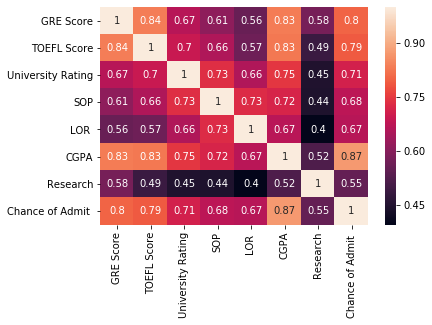

In [16]:
sns.heatmap(df.corr(),annot=True)

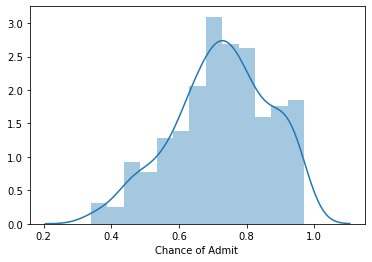

In [14]:
sns.distplot(df['Chance of Admit '])

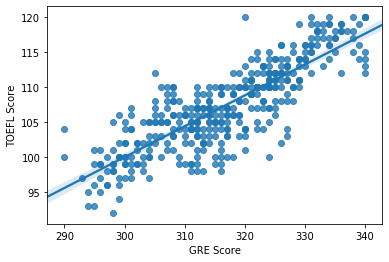

In [15]:
sns.regplot(df['GRE Score'],df['TOEFL Score'])

In [21]:
# Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Accuracy: {np.round(1-(np.sqrt(mean_squared_error(y_test, predictions))),4)*100} %")

Accuracy: 94.26 %


In [33]:
df1 = df.drop(columns=['GRE Score'])

In [34]:
df1

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
395,110,3,3.5,3.5,9.04,1,0.82
396,107,3,3.0,3.5,9.11,1,0.84
397,116,4,5.0,4.5,9.45,1,0.91
398,103,3,3.5,4.0,8.78,0,0.67


In [35]:
X = df1.drop(['Chance of Admit '], axis=1)
y = df1['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Accuracy: {np.round(1-(np.sqrt(mean_squared_error(y_test, predictions))),4)*100} %")

Accuracy: 94.45 %


In [38]:
 model.score(X_train,y_train)

0.7956346735883237